In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from yellowbrick.contrib.classifier import DecisionViz

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
### Datasets:

df = pd.read_csv('../occupancy_data/training_preprocessed.csv')
df_test = pd.read_csv('../occupancy_data/test_preprocessed.csv')

df = df.drop('Unnamed: 0', 1)
df_test = df_test.drop('Unnamed: 0', 1)

In [3]:
# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [4]:
from sklearn.preprocessing import StandardScaler

In [6]:
#standardising the data:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(2)

In [8]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [9]:
X_test_pca = pca.transform(X_test_scaled)

## Non-linear SVM

In [10]:
from sklearn.svm import SVC
from scipy.stats import expon

In [92]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6),
              'gamma': expon(scale=.1),
             }

Randomized search with:
- 3-fold cross-validation
- n_iter = 10

In [93]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 10)

In [94]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c2b6d3438>,
                                        'degree': array([2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c328ec5f8>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [95]:
# doppione di cella sopra, solo per evitare di rifare la RandomizedSearch
svm = svm.best_estimator_

In [96]:
# doppione di cella sopra, solo per evitare di rifare la RandomizedSearch
svm.fit(X_train_scaled, y_train)

SVC(C=285.73393600454773, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2,
    gamma=0.005186916996426215, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
y_pred = svm.predict(X_test_scaled)

In [98]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [129]:
support_vectors = svm.support_vectors_

In [130]:
support_vectors_pca = pca.transform(support_vectors)

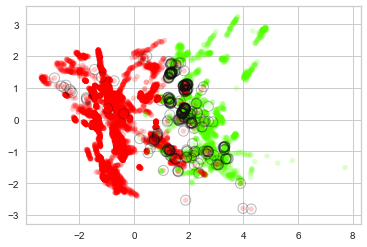

In [133]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.2, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.3)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [102]:
svm.fit(X_train_pca, y_train)

SVC(C=285.73393600454773, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2,
    gamma=0.005186916996426215, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
y_pred = svm.predict(X_test_pca)

In [104]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9566542499153403
F1-score [0.97232432 0.90007806]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.92      0.89      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


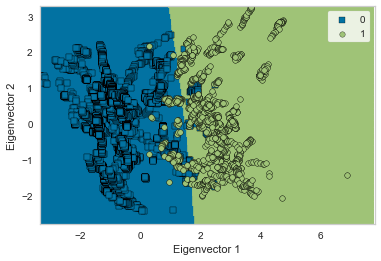

In [105]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 3-fold cross-validation
- n_iter = 30

In [106]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 30)

In [107]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c2b6d3438>,
                                        'degree': array([2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c328ec5f8>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [108]:
y_pred = svm.predict(X_test_scaled)

In [109]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [110]:
support_vectors = svm.best_estimator_.support_vectors_

In [111]:
support_vectors_pca = pca.transform(support_vectors)

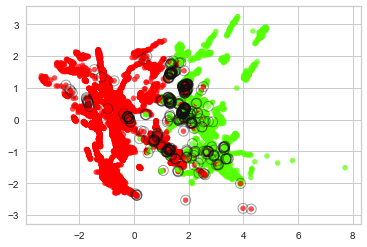

In [112]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.4)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [113]:
svm = svm.best_estimator_

In [11]:
svm =SVC(C=3.069179342597324, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.008942213771151888, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [114]:
svm.fit(X_train_pca, y_train)

SVC(C=3.069179342597324, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.008942213771151888, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
y_pred = svm.predict(X_test_pca)

In [116]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9551303758889265
F1-score [0.97133586 0.89676665]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.95      0.96      0.95      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


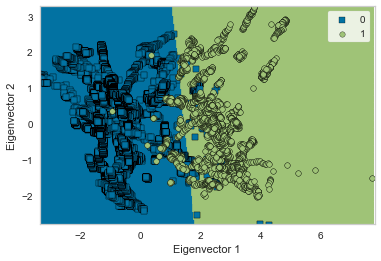

In [12]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_train_pca, y_train)
viz.show()

Randomized search with:
- 3-fold cross-validation
- n_iter = 70

In [37]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 70)

In [38]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [39]:
y_pred = svm.predict(X_test_scaled)

In [40]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [41]:
support_vectors = svm.best_estimator_.support_vectors_

In [42]:
support_vectors_pca = pca.transform(support_vectors)

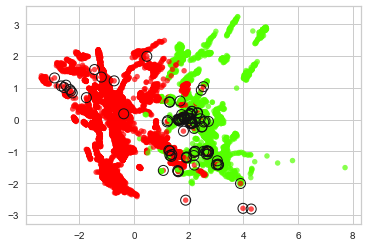

In [43]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.6)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [44]:
svm = svm.best_estimator_

In [45]:
svm.fit(X_train_pca, y_train)

SVC(C=23.514310327314643, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.012659788738871837, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
y_pred = svm.predict(X_test_pca)

In [47]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9569928885878768
F1-score [0.97254648 0.90078125]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.92      0.89      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


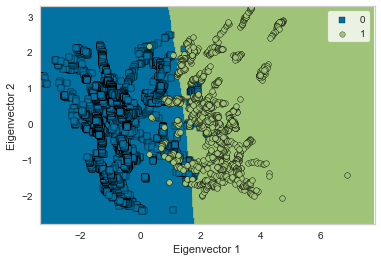

In [48]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 5-fold cross-validation
- n_iter = 70

In [49]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 70)

In [50]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [51]:
y_pred = svm.predict(X_test_scaled)

In [52]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [53]:
support_vectors = svm.best_estimator_.support_vectors_

In [54]:
support_vectors_pca = pca.transform(support_vectors)

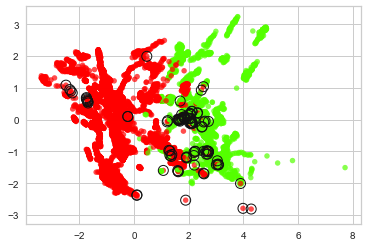

In [55]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.7)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [56]:
svm = svm.best_estimator_

In [57]:
svm.fit(X_train_pca, y_train)

SVC(C=156.40606490784745, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.0025830751869464867, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
y_pred = svm.predict(X_test_pca)

In [59]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9556383338977311
F1-score [0.97166342 0.89789556]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


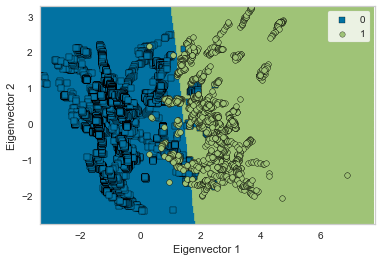

In [60]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 10-fold cross-validation
- n_iter = 70

In [61]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 10, n_iter = 70)

In [62]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
    

In [63]:
y_pred = svm.predict(X_test_scaled)

In [64]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [65]:
support_vectors = svm.best_estimator_.support_vectors_

In [66]:
support_vectors_pca = pca.transform(support_vectors)

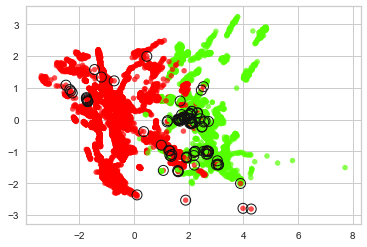

In [67]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.6)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [68]:
svm = svm.best_estimator_

In [69]:
svm.fit(X_train_pca, y_train)

SVC(C=195.23248065240114, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=4,
    gamma=0.004376049757584369, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
y_pred = svm.predict(X_test_pca)

In [71]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9558076532339993
F1-score [0.97178073 0.89816621]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


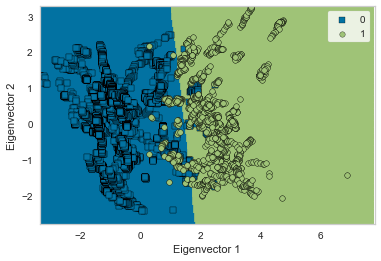

In [72]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Redoing cv= 5 with gamma != 1 (otherwise linear threshold chosen)

In [73]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6),
              'gamma': expon(scale=.1)}

Randomized search with:
- 5-fold cross-validation
- n_iter = 70

In [74]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 70)

In [75]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c3c2935c0>,
                                        'degree': array([2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c3c2936a0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [76]:
y_pred = svm.predict(X_test_scaled)

In [77]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [78]:
support_vectors = svm.best_estimator_.support_vectors_

In [79]:
support_vectors_pca = pca.transform(support_vectors)

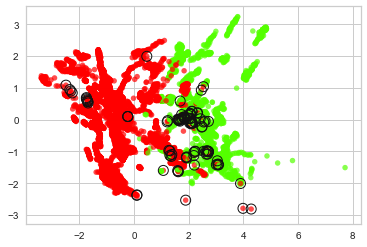

In [80]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [81]:
svm = svm.best_estimator_

In [82]:
svm.fit(X_train_pca, y_train)

SVC(C=17.002479960263646, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.007713683681102392, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
y_pred = svm.predict(X_test_pca)

In [84]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155834 0.89746589]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


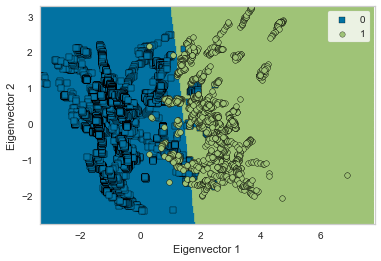

In [85]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

## Non-linear SVM on dataset with 2 of the original dimensions

The two dimensions have been selected that resulted the most important in dt classification: DeltaLight and DeltaHumidity

In [13]:
df = df[['Delta Light','Delta Humidity','Occupancy']]
df_test = df_test[['Delta Light','Delta Humidity','Occupancy']]

In [14]:
# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [10]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,5),
              'gamma': expon(scale=.1),
             }

In [10]:
svm_dt = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 20)  

In [81]:
svm_dt.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c57803080>,
                                        'degree': array([2, 3, 4]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c57803390>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
           

In [16]:
# again, this is just a replica of the above cell I use to avoid doing the Randomized Search again
svm_dt = SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False)

In [30]:
svm_dt.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
y_pred = svm_dt.predict(X_test_scaled)

In [83]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9911953945140535
F1-score [0.99432438 0.98037736]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.96      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [33]:
svm_dt.support_vectors_

array([[ 2.07250003e+00, -7.76820647e-01],
       [ 2.05853253e+00, -7.61112247e-01],
       [ 2.05853253e+00, -7.68093758e-01],
       [ 1.39308095e+00, -4.96449500e-01],
       [ 1.45294166e+00, -5.05969742e-01],
       [ 1.16608913e+00, -3.65070150e-01],
       [ 1.21248119e+00, -3.65070150e-01],
       [ 1.60606536e+00, -3.69830272e-01],
       [ 1.56116983e+00, -3.79350514e-01],
       [ 1.14663440e+00, -4.01247073e-01],
       [ 1.19252761e+00, -4.07593901e-01],
       [ 1.17806128e+00, -4.25047679e-01],
       [ 1.12269012e+00, -4.26634387e-01],
       [ 2.03257293e+00, -4.72966234e-01],
       [ 1.47287528e+00, -4.96449500e-01],
       [ 2.22263069e+00, -5.85183355e-02],
       [ 2.01760776e+00, -5.85183355e-02],
       [ 1.53273599e+00, -5.85183355e-02],
       [ 1.91584455e+00, -4.47139836e-02],
       [ 1.92632017e+00, -2.23414132e-02],
       [ 1.45591475e+00, -2.80535589e-02],
       [ 1.43596118e+00, -3.94778501e-02],
       [ 1.51178474e+00, -3.94778501e-02],
       [ 1.

In [34]:
sup_vecs_original = scaler.inverse_transform(svm_dt.support_vectors_)

In [35]:
sup_vecs_original

array([[ 4.33557704e+02, -3.88267516e+00],
       [ 4.31199423e+02, -3.80071112e+00],
       [ 4.31199423e+02, -3.83713958e+00],
       [ 3.18844201e+02, -2.41974132e+00],
       [ 3.28951118e+02, -2.46941649e+00],
       [ 2.80518774e+02, -1.73422394e+00],
       [ 2.88351634e+02, -1.73422394e+00],
       [ 3.54804610e+02, -1.75906152e+00],
       [ 3.47224423e+02, -1.80873669e+00],
       [ 2.77234026e+02, -1.92298959e+00],
       [ 2.84982662e+02, -1.95610637e+00],
       [ 2.82540157e+02, -2.04717752e+00],
       [ 2.73191259e+02, -2.05545672e+00],
       [ 4.26816390e+02, -2.29720923e+00],
       [ 3.32316721e+02, -2.41974132e+00],
       [ 4.58905850e+02, -1.34683373e-01],
       [ 4.24289661e+02, -1.34683373e-01],
       [ 3.42423637e+02, -1.34683373e-01],
       [ 4.07107903e+02, -6.26543725e-02],
       [ 4.08876614e+02,  5.40822835e-02],
       [ 3.29453095e+02,  2.42771798e-02],
       [ 3.26084122e+02, -3.53330275e-02],
       [ 3.38886217e+02, -3.53330275e-02],
       [ 3.

In [36]:
X_train_scaled_rev = scaler.inverse_transform(X_train_scaled)
X_test_scaled_rev = scaler.inverse_transform(X_test_scaled)

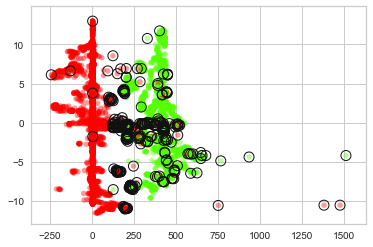

In [40]:
plt.scatter(X_train_scaled_rev[:, 0], X_train_scaled_rev[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(sup_vecs_original[:, 0], sup_vecs_original[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

PER MARTA: GRAFICO QUA SOTTO:

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


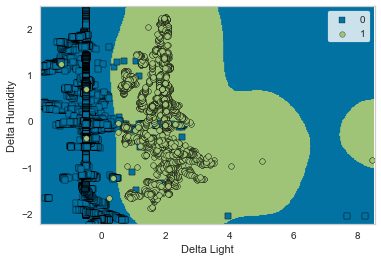

In [17]:
viz = DecisionViz(
    svm_dt,
    features=['Delta Light', 'Delta Humidity']
)
viz.fit(X_train_scaled, y_train)
viz.draw(X_train_scaled, y_train)
viz.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


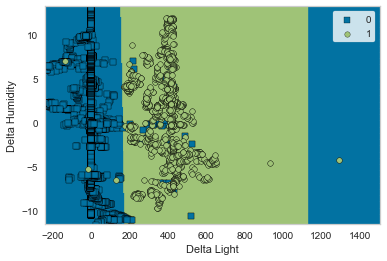

In [39]:
viz = DecisionViz(
    svm_dt,
    features=['Delta Light', 'Delta Humidity']
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

Can ignore what follows (was only modifying some of the parameters and not doing it the optimal way, anyway).
Or maybe use some of it for report.

In [39]:
parameters = {'C': np.arange(0.5, 5.5, 0.5),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(1,6)
             }

Grid search with 3-fold cross-validation:

In [42]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 3)

In [43]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
y_pred = svm.predict(X_test_scaled)

In [45]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [48]:
support_vectors = svm.best_estimator_.support_vectors_

In [55]:
support_vectors_pca = pca.transform(support_vectors)

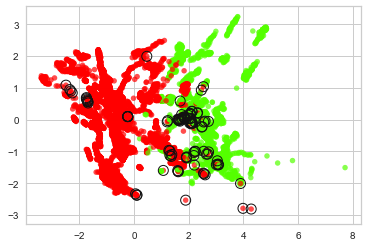

In [56]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [60]:
svm = svm.best_estimator_

In [63]:
svm.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
y_pred = svm.predict(X_test_pca)

In [66]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9654588554012868
F1-score [0.97783572 0.92177914]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4604
           1       0.92      0.92      0.92      1302

    accuracy                           0.97      5906
   macro avg       0.95      0.95      0.95      5906
weighted avg       0.97      0.97      0.97      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


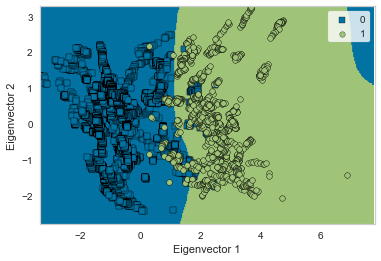

In [67]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 5-fold cross-validation:

In [68]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 5)

In [69]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
y_pred = svm.predict(X_test_scaled)

In [71]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [72]:
support_vectors = svm.best_estimator_.support_vectors_

In [73]:
support_vectors_pca = pca.transform(support_vectors)

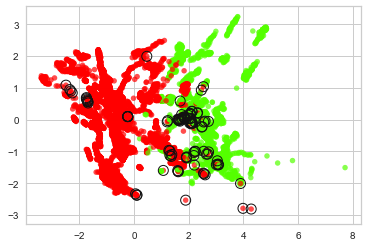

In [74]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [75]:
svm = svm.best_estimator_

In [76]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
y_pred = svm.predict(X_test_pca)

In [78]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155219 0.89754577]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


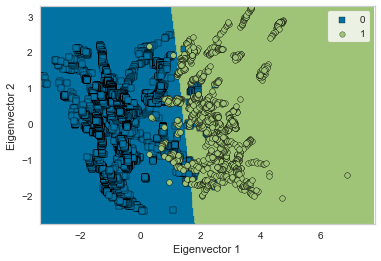

In [79]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 10-fold cross-validation:

In [80]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 10)

In [1]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
            ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
           plot_svc_decision_function(svm)

In [81]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
y_pred = svm.predict(X_test_scaled)

In [83]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [84]:
support_vectors = svm.best_estimator_.support_vectors_

In [85]:
support_vectors_pca = pca.transform(support_vectors)

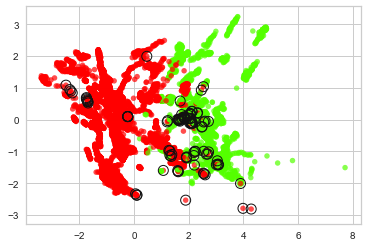

In [86]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [87]:
svm = svm.best_estimator_

In [88]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
y_pred = svm.predict(X_test_pca)

In [90]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155219 0.89754577]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


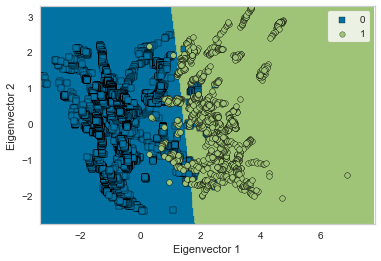

In [91]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

<b>Interestingly enough, with 5- and 10- fold cross validation the best results are yielded by a kernel function equivalent to a simple linear function (poly with degree=1). Will now rerun 5- and 10-fold cross-validation taking out the possibility of degree=1.</b>

Grid search with 5-fold cross-validation:

In [93]:
parameters = {'C': np.arange(0.5, 5.5, 0.5),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6)
             }

In [94]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 5)

In [95]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
y_pred = svm.predict(X_test_scaled)

In [97]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9922113105316627
F1-score [0.99498255 0.98260212]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [98]:
support_vectors = svm.best_estimator_.support_vectors_

In [99]:
support_vectors_pca = pca.transform(support_vectors)

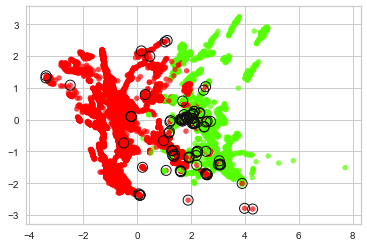

In [100]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [101]:
svm = svm.best_estimator_

In [102]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
y_pred = svm.predict(X_test_pca)

In [104]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9642736200474095
F1-score [0.97706272 0.9192499 ]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4604
           1       0.92      0.92      0.92      1302

    accuracy                           0.96      5906
   macro avg       0.95      0.95      0.95      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


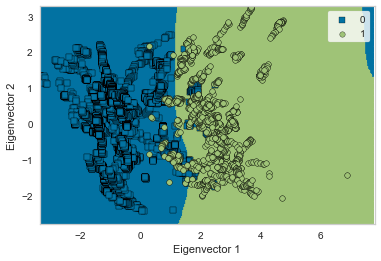

In [105]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 10-fold cross-validation:

In [106]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 10)

In [107]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
y_pred = svm.predict(X_test_scaled)

In [109]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9922113105316627
F1-score [0.99498255 0.98260212]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [110]:
support_vectors = svm.best_estimator_.support_vectors_

In [111]:
support_vectors_pca = pca.transform(support_vectors)

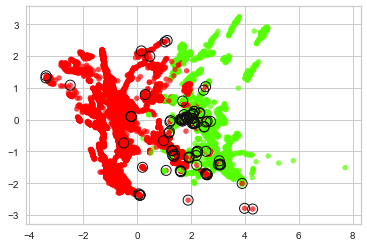

In [112]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [113]:
svm = svm.best_estimator_

In [114]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
y_pred = svm.predict(X_test_pca)

In [116]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9642736200474095
F1-score [0.97706272 0.9192499 ]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4604
           1       0.92      0.92      0.92      1302

    accuracy                           0.96      5906
   macro avg       0.95      0.95      0.95      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


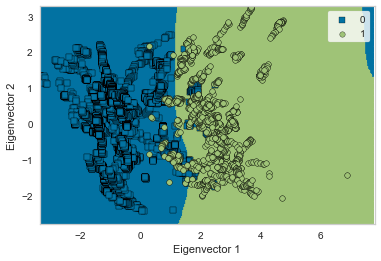

In [117]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()